## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here
%matplotlib inline
import numpy as np
random_data = np.random.random((20, 2))

In [2]:
import matplotlib.pyplot as plt
X, y = random_data[:, 0], random_data[:, 1]

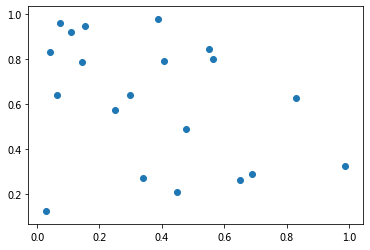

In [3]:
plt.scatter(X, y)

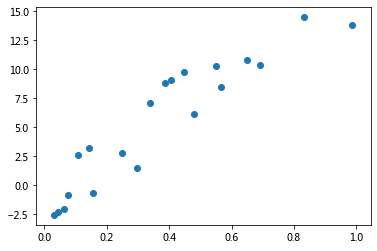

In [4]:
#按照15x+b 初始化y，b是噪音 -3到3的均匀分布
import random
def assmuing_function(x):
    return 15 * x + random.randint(-3, 3)
y = [assmuing_function(x) for x in X]
plt.scatter(X, y)

In [5]:
X.reshape(-1, 1)

array([[0.33989494],
       [0.07482905],
       [0.10759266],
       [0.47801609],
       [0.98740731],
       [0.24984036],
       [0.65009438],
       [0.83100221],
       [0.4060931 ],
       [0.44825233],
       [0.04282931],
       [0.02967353],
       [0.14433568],
       [0.55125599],
       [0.68967874],
       [0.38653295],
       [0.15409081],
       [0.2963168 ],
       [0.56527741],
       [0.0635665 ]])

In [6]:
y

[7.098424123821499,
 -0.8775642895814855,
 2.6138898783778077,
 6.170241318914362,
 13.81110971529926,
 2.7476054648306674,
 10.751415660606822,
 14.465033180166127,
 9.091396570754501,
 9.723784946207061,
 -2.3575603691096356,
 -2.5548971123907265,
 3.165035205088972,
 10.268839813733821,
 10.34518116403323,
 8.797994234609146,
 -0.6886379215684575,
 1.4447519719334618,
 8.47916108312044,
 -2.046502485293443]

score: 0.8695820554323314
coef_: [18.56917796]
intercept_: -1.4378314310784344


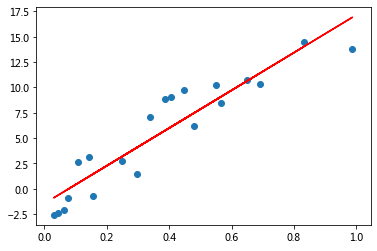

In [7]:
y = np.array(y)
from sklearn.linear_model import LinearRegression
#使用sklearn 的LR模块
reg = LinearRegression().fit(X.reshape(-1, 1), y)
#Return the coefficient of determination R^2 of the prediction.
print("score:",reg.score(X.reshape(-1, 1), y))
#Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
print("coef_:",reg.coef_)
#Independent term in the linear model.
print("intercept_:",reg.intercept_)
def f(x): 
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [8]:
reg.predict([[2]])

array([35.70052449])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [50]:
#导入cosine距离
from scipy.spatial.distance import cosine
#获取（X,y) 的list
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]
#计算距离
def distance(x1, x2):
    #return cosine(x1, x2)
    return abs(x1-x2)

In [51]:
def predict(x, k=5):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # -> regression: numerical -> most_similars (y)
    # -> classification: categorical -> most_similar (y)
    
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 
    return most_similars

In [52]:
from collections import Counter
most_similars = predict(2)
most_similars
#Counter(most_similars).most_common()

[(0.987407314353284, 13.81110971529926),
 (0.8310022120110752, 14.465033180166127),
 (0.689678744268882, 10.34518116403323),
 (0.6500943773737882, 10.751415660606822),
 (0.5652774055413626, 8.47916108312044)]

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

In [39]:
from icecream import ic
def entropy(elements):
    '''群体的混乱程度'''
    #返回每个元素的个数
    counter = Counter(elements)
    #元素出现的概率
    probs = [counter[c] / len(elements) for c in set(elements)]
    #打印元素出现的概率，由于是set 并不对应与相应位置
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [14]:
entropy([1, 2, 3, 4, 1])

ic| probs: [0.4, 0.2, 0.2, 0.2]


1.3321790402101223

In [53]:
import pandas as pd
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 0, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,0,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [58]:
test_data = {
    'gender':['F'],
    'income': ['+10'],
    'family_number': [1],
    'pet': [1],
    'bought': [1]
}
test_data = pd.DataFrame.from_dict(test_data)
test_data


,gender,income,family_number,pet,bought
0,F,+10,1,1,1


In [54]:
target = 'bought'
x_fields =  set(dataset.columns.tolist()) - {target}

In [55]:
x_fields

{'family_number', 'gender', 'income', 'pet'}

In [56]:
#存在一个问题，限于列中的值是两种
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str, x_fields) -> str:
    #需要寻找的最佳分类的一列的列表
    spliter = None
    #初始化最小的熵
    min_entropy = float('inf')
    #遍历所有的列名，寻找最佳列名
    for f in x_fields:
        #一列中包含的数据
        values = set(training_data[f])
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            
            entropy_2 = entropy(sub_spliter_2)
            
            entropy_v = entropy_1 + entropy_2
            #赋值最小的熵和相应的列名
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    return spliter

In [57]:
chose_list = []
while x_fields:
    find_result = find_the_optimal_spilter(dataset,target,x_fields)
    print(find_result)
    chose_list.append(find_result)
    x_fields = x_fields - {find_result[0]}
    

('pet', 1)
('family_number', 2)
('income', '+10')
('gender', 'F')


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

In [43]:
from sklearn.cluster import KMeans

In [44]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

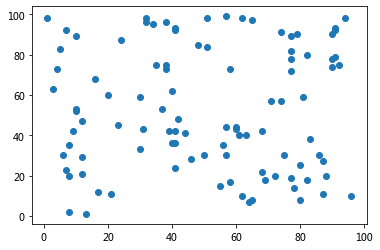

In [45]:
plt.scatter(X1, X2)


In [46]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
cluster.cluster_centers_

array([[83.22222222, 79.66666667],
       [11.66666667, 73.08333333],
       [13.28571429, 25.07142857],
       [48.7       , 40.15      ],
       [45.0625    , 89.1875    ],
       [75.6       , 18.35      ]])

In [48]:
cluster.labels_

array([3, 5, 3, 2, 4, 1, 3, 4, 4, 5, 5, 3, 1, 1, 5, 2, 2, 0, 0, 4, 2, 2,
       0, 3, 3, 5, 3, 2, 3, 5, 4, 0, 4, 2, 3, 3, 5, 3, 5, 2, 0, 1, 4, 3,
       3, 5, 0, 0, 2, 1, 0, 4, 5, 3, 5, 4, 0, 0, 5, 4, 4, 2, 1, 0, 0, 2,
       0, 1, 3, 5, 2, 4, 2, 5, 5, 0, 1, 1, 0, 3, 1, 5, 0, 0, 5, 5, 3, 3,
       3, 5, 0, 3, 4, 4, 2, 1, 4, 1, 5, 4], dtype=int32)

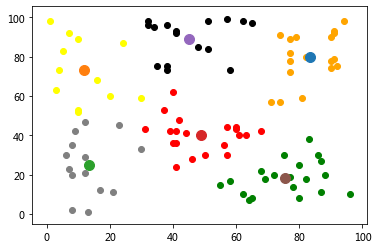

In [49]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型都是问题的简化，所有的模型并不能完全的拟合原始的问题，都会存在一定的误差， 但是有些模型的误差在我们可以接受的范围内

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: 过拟合：模型在训练集上表现的很好，偏差低，方差高.  测试集表现的很差 欠拟合：模型在训练集测试集都表现的很差,偏差高，方差低
数据量太少或者噪音太多容易产生过拟合，  欠拟合有可能由于模型的复杂度太低，训练不到数据的关键信息。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:<br>
precision：所有预测的正类中，正确预测正类的比例<br>
recall：所有实际的正类中，正确预测为正类的比例<br>
AUC:ROC曲线下与坐标轴围成的面积,值越大正确率越高<br>
F1: 召回率和精度的调和平均 B=1<br>
F2: 召回权重比精度高 B=2<br>

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 机器学习是我们定义一个模型通过对数据进行模型拟合，来解决问题。 主要是通过自动发现数据里的信息来解决问题。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
正确的定义了评价标准，就可以正确的评价模型的好坏，这样就可以正确的使用模型

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [64]:
test_data['pet'][0]

1

In [60]:
chose_list

[('pet', 1), ('family_number', 2), ('income', '+10'), ('gender', 'F')]

In [61]:

dataset[dataset['pet'] == 1]

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
6,M,-10,2,1,1


In [69]:
dataset[dataset['pet'] == 1][target].tolist()

[1, 1, 1]

In [70]:
dataset[dataset['pet'] == test_data['pet'][0]]

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
6,M,-10,2,1,1


In [71]:
len(dataset[dataset['pet'] == test_data['pet'][0]])

3

In [77]:
Counter([2,1,1,3]).most_common()[0][0]

1

In [100]:
test_data = {
    'gender':['M'],
    'income': ['-10'],
    'family_number': [1],
    'pet': ['null'],
    'bought': [1]
}
test_data = pd.DataFrame.from_dict(test_data)
test_data

,gender,income,family_number,pet,bought
0,M,-10,1,null,1


In [108]:
test_data[['pet'][0]][0]

'null'

In [109]:
# you code here
test_data
chose_list
dataset
def predicate(pre_data: pd.DataFrame,test_data,target,chose_list):
    for i in chose_list:
        if test_data[[i[0]][0]][0] == "null":
            continue
        after_data = pre_data[pre_data[i[0]] == test_data[i[0]][0]]
        len_after_data = len(after_data)
        result_list = pre_data[pre_data[i[0]] == test_data[i[0]][0]][target].tolist()
        len_result_list = len(result_list)
        if len_result_list==len_after_data:
            return result_list[0]
        pre_data = after_data
    return Counter(result_list).most_common()[0][0]

In [110]:
test_data

,gender,income,family_number,pet,bought
0,M,-10,1,null,1


In [111]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,0,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [112]:
chose_list

[('pet', 1), ('family_number', 2), ('income', '+10'), ('gender', 'F')]

In [113]:
predicate(dataset,test_data,target,chose_list)

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [2]:
# you code here
#定义数据
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

#define target function
def price(rm, k, b):
    return k * rm + b


# define loss function ,修改绝对值
def loss(y,y_hat):
    return sum( abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))


# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        mul = y_i-y_hat_i
        if mul > 0:
            gradient += -x_i
        if mul < 0:
            gradient += x_i
        if mul == 0:
            gradient += 0
    return 1/n * gradient



def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        mul = y_i-y_hat_i
        if mul > 0:
            gradient += -1
        if mul < 0:
            gradient += 1
        if mul == 0:
            gradient += 0
    return 1 / n * gradient

In [3]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 125.25119504993054, parameters k is 18.505843339852703 and b is 31.481541953458134
Iteration 1, the loss is 125.21069842054797, parameters k is 18.49955870546535 and b is 31.480541953458133
Iteration 2, the loss is 125.17020179116537, parameters k is 18.493274071077998 and b is 31.47954195345813
Iteration 3, the loss is 125.1297051617826, parameters k is 18.486989436690646 and b is 31.47854195345813
Iteration 4, the loss is 125.08920853239995, parameters k is 18.480704802303293 and b is 31.47754195345813
Iteration 5, the loss is 125.04871190301715, parameters k is 18.47442016791594 and b is 31.476541953458128
Iteration 6, the loss is 125.00821527363455, parameters k is 18.46813553352859 and b is 31.475541953458126
Iteration 7, the loss is 124.96771864425176, parameters k is 18.461850899141236 and b is 31.474541953458125
Iteration 8, the loss is 124.92722201486914, parameters k is 18.455566264753884 and b is 31.473541953458124
Iteration 9, the loss is 124.886725

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)